In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from model import KNN

# KNN with Iris dataset


In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"])
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [4]:
label_name = ['setosa', 'versicolor', 'virginica']

In [5]:
KNN_Model = KNN(X_train, y_train, k = 5)
test_position = 0
predict = KNN_Model.fit_predict(X_test[test_position])
print(f"label_predict: {label_name[predict]}, label_test: {label_name[y_test[test_position]]}")

label_predict: versicolor, label_test: versicolor


In [6]:
eval = KNN_Model.evaluate(X_test, y_test)
print(f"Accuracy to predict test set: {eval * 100}%")

Accuracy to predict test set: 100.0%


# KNN for Mnist dataset

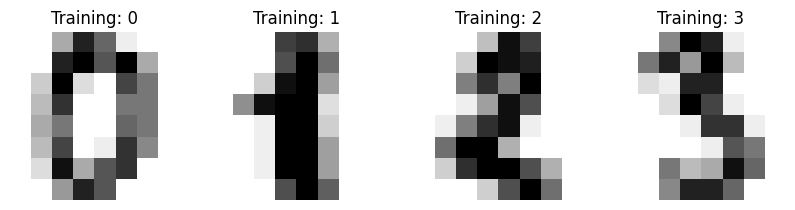

In [7]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [8]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=True)

In [9]:
KNN_Model = KNN(X_train, y_train, k = 5)
test_position = 10
predict = KNN_Model.fit_predict(X_test[test_position])
print(f"label_predict: {predict}, label_test: {y_test[test_position]}")

label_predict: 2, label_test: 2


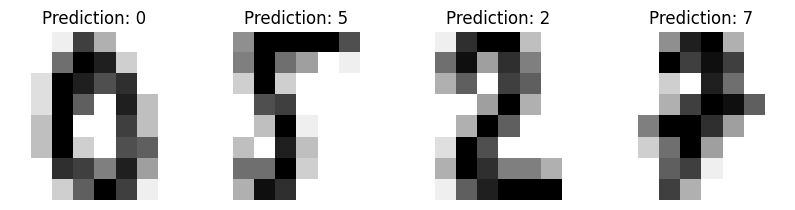

In [10]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
i = 0
for ax, image in zip(axes, X_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    predict = KNN_Model.fit_predict(X_test[i])
    i += 1
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {predict}")

In [11]:
eval = KNN_Model.evaluate(X_test, y_test)
print(f"Accuracy to predict test set: {eval * 100}%")

Accuracy to predict test set: 98.77641824249166%
